## 문자 임베딩(Character Embedding) 활용하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data = pd.read_csv('C:/Users/Myeong/dding/data/ner_dataset.csv', encoding='latin1')

data = data.fillna(method='ffill') # Null값을 가진 행의 바로 앞의 행의 값으로 Null값을 채움
data['Word'] = data['Word'].str.lower()

func = lambda temp: [(w,t) for w,t in zip(temp['Word'].values.tolist(), temp['Tag'].values.tolist())]
tagged_sentences = [t for t in data.groupby('Sentence #').apply(func)]

sentences, ner_tags = [],[]
for tagged_sentence in tagged_sentences:

    sentence, tag_info = zip(*tagged_sentence)
    sentences.append(list(sentence))
    ner_tags.append(list(tag_info))

샘플의 최대 길이 : 104
샘플의 평균 길이 : 21.863988


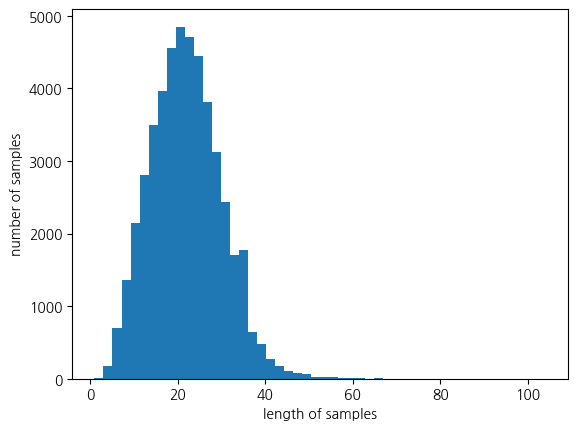

In [2]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [3]:
src_tokenizer = Tokenizer(oov_token='OOV')
tar_tokenizer = Tokenizer(lower=False)

src_tokenizer.fit_on_texts(sentences)
tar_tokenizer.fit_on_texts(ner_tags)

vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1

print(vocab_size)
print(tag_size)

31819
18


In [4]:
x_data = src_tokenizer.texts_to_sequences(sentences)
x_data = x_data[:10000]
y_data = tar_tokenizer.texts_to_sequences(ner_tags)
y_data = y_data[:10000]

word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

print(index_to_ner)

{1: 'O', 2: 'B-geo', 3: 'B-tim', 4: 'B-org', 5: 'I-per', 6: 'B-per', 7: 'I-org', 8: 'B-gpe', 9: 'I-geo', 10: 'I-tim', 11: 'B-art', 12: 'B-eve', 13: 'I-art', 14: 'I-eve', 15: 'B-nat', 16: 'I-gpe', 17: 'I-nat', 0: 'PAD'}


In [5]:
maxlen = 70
x_data = pad_sequences(x_data, maxlen=maxlen)
y_data = pad_sequences(y_data, maxlen=maxlen)

x_train, x_test, y_train_int, y_test_int = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

y_train = to_categorical(y_train_int, num_classes=tag_size)
y_test = to_categorical(y_test_int, num_classes=tag_size)

print('훈련 샘플 문장의 크기 : {}'.format(x_train.shape))
print('훈련 샘플 레이블(정수 인코딩)의 크기 : {}'.format(y_train_int.shape))
print('훈련 샘플 레이블(원-핫 인코딩)의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(x_test.shape))
print('테스트 샘플 레이블(정수 인코딩)의 크기 : {}'.format(y_test_int.shape))
print('테스트 샘플 레이블(원-핫 인코딩)의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (8000, 50)
훈련 샘플 레이블(정수 인코딩)의 크기 : (8000, 50)
훈련 샘플 레이블(원-핫 인코딩)의 크기 : (8000, 50, 18)
테스트 샘플 문장의 크기 : (2000, 50)
테스트 샘플 레이블(정수 인코딩)의 크기 : (2000, 50)
테스트 샘플 레이블(원-핫 인코딩)의 크기 : (2000, 50, 18)


In [6]:
# char vocab 만들기
words = list(set(data['Word'].values))
chars = set([w_i for w in words for w_i in w])
chars = sorted(list(chars))
print(chars)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '@', '[', ']', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '~', '\x85', '\x91', '\x92', '\x93', '\x94', '\x96', '\x97', '\xa0', '°', 'é', 'ë', 'ö', 'ü']


In [7]:
char_to_index = {c : i+2 for i,c in enumerate(chars)}
char_to_index['OOV'] = 1
char_to_index['PAD'] = 0

index_to_char = {value : key for key, value in char_to_index.items()}
index_to_char

{2: '!',
 3: '"',
 4: '#',
 5: '$',
 6: '%',
 7: '&',
 8: "'",
 9: '(',
 10: ')',
 11: '+',
 12: ',',
 13: '-',
 14: '.',
 15: '/',
 16: '0',
 17: '1',
 18: '2',
 19: '3',
 20: '4',
 21: '5',
 22: '6',
 23: '7',
 24: '8',
 25: '9',
 26: ':',
 27: ';',
 28: '?',
 29: '@',
 30: '[',
 31: ']',
 32: '_',
 33: '`',
 34: 'a',
 35: 'b',
 36: 'c',
 37: 'd',
 38: 'e',
 39: 'f',
 40: 'g',
 41: 'h',
 42: 'i',
 43: 'j',
 44: 'k',
 45: 'l',
 46: 'm',
 47: 'n',
 48: 'o',
 49: 'p',
 50: 'q',
 51: 'r',
 52: 's',
 53: 't',
 54: 'u',
 55: 'v',
 56: 'w',
 57: 'x',
 58: 'y',
 59: 'z',
 60: '~',
 61: '\x85',
 62: '\x91',
 63: '\x92',
 64: '\x93',
 65: '\x94',
 66: '\x96',
 67: '\x97',
 68: '\xa0',
 69: '°',
 70: 'é',
 71: 'ë',
 72: 'ö',
 73: 'ü',
 1: 'OOV',
 0: 'PAD'}

In [8]:
max_len_char = 15

def padding_char_indice(char_indice ,max_len_char):
    return pad_sequences(char_indice, maxlen=max_len_char, padding='post', value=0)

def integer_coding(sentences):
    char_data = []
    for ts in sentences:
        word_indice = [word_to_index[t] for t in ts]
        char_indice = [[char_to_index[char] for char in t]for t in ts]
        char_indice = padding_char_indice(char_indice, max_len_char)

        for chars_of_token in char_indice:
            if len(chars_of_token) > max_len_char:
                continue
        char_data.append(char_indice)
    return char_data

x_char_data = integer_coding(sentences)

In [9]:
sentences[0]

['thousands',
 'of',
 'demonstrators',
 'have',
 'marched',
 'through',
 'london',
 'to',
 'protest',
 'the',
 'war',
 'in',
 'iraq',
 'and',
 'demand',
 'the',
 'withdrawal',
 'of',
 'british',
 'troops',
 'from',
 'that',
 'country',
 '.']

In [10]:
x_data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  254,    6,  967,   16, 1795,  238,  468,
          7,  523,    2,  129,    5,   61,    9,  571,    2,  833,    6,
        186,   90,   22,   15,   56,    3])

In [13]:
x_char_data = x_char_data[:10000]
x_char_data = pad_sequences(x_char_data, maxlen=maxlen, padding='post', value=0)

x_char_train, x_char_test, _, _=train_test_split(x_char_data, y_data, test_size=0.2, random_state=42)

x_char_train = np.array(x_char_train)
x_char_test = np.array(x_char_test)

In [14]:
x_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,  4651,   998,    36,    18,    76,
          15,     2,   350,    19,  1090,     5,    41,   681,     4,
          62,     8,  7549, 12666,     3])

In [15]:
index_to_word[117]

'south'

In [16]:
' '.join([index_to_char[index] for index in x_char_train[0][0]])

'k u w a i t i PAD PAD PAD PAD PAD PAD PAD PAD'

In [17]:
print('훈련 샘플 문장의 크기 : {}'.format(x_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('훈련 샘플 char 데이터의 크기 : {}'.format(x_char_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(x_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (8000, 50)
훈련 샘플 레이블의 크기 : (8000, 50, 18)
훈련 샘플 char 데이터의 크기 : (8000, 50, 15)
테스트 샘플 문장의 크기 : (2000, 50)
테스트 샘플 레이블의 크기 : (2000, 50, 18)


## BiLSTM-CNN 

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, TimeDistributed, Dropout, concatenate, Bidirectional, LSTM, Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras import Model
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from seqeval.metrics import f1_score, classification_report
from keras_crf import CRFModel

embedding_dim = 1
char_embedding_dim = 1
dropout_ratio = 0.2
hidden_units = 1
num_filters = 1
kernel_size = 1

# word embedding
word_ids = Input(shape=(None, ), dtype='int32', name='words_input')
word_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(word_ids)

# char embedding
char_ids = Input(shape=(None, max_len_char, ), name='char_input')
embed_char_out = TimeDistributed(Embedding(
    len(char_to_index), 
    char_embedding_dim, 
    embeddings_initializer=RandomUniform(minval=-0.5, maxval=0.5)),
    name='char_embedding')(char_ids)
dropout = Dropout(dropout_ratio)(embed_char_out)

# char 임베딩에는 Conv1D 수행
conv1d_out = TimeDistributed(Conv1D(
    kernel_size=kernel_size,
    filters=num_filters,
    padding='same',
    activation='tanh',
    strides=1
))(dropout)
maxpool_out = TimeDistributed(MaxPooling1D(max_len_char))(conv1d_out)
char_embeddings = TimeDistributed(Flatten())(maxpool_out)
char_embeddings = Dropout(dropout_ratio)(char_embeddings)

# char 임베딩 수행 후 단어 임베딩과 연결
output = concatenate([word_embedding, char_embeddings])

output = Bidirectional(LSTM(hidden_units, return_sequences=True, dropout=dropout_ratio))(output)

output = TimeDistributed(Dense(tag_size, activation='softmax'))(output)

model = Model(inputs=[word_ids, char_ids], outputs=[output])
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['acc'])

In [19]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
history = model.fit([x_train, x_char_train], y_train, batch_size=1, epochs=15, validation_split=0.1, verbose=1, callbacks=[es])

Epoch 1/15
7200/7200 [==============================] - 110s 15ms/step - loss: 0.7602 - acc: 0.7613 - val_loss: 0.3135 - val_acc: 0.9342
Epoch 2/15
7200/7200 [==============================] - 105s 15ms/step - loss: 0.3009 - acc: 0.9281 - val_loss: 0.2319 - val_acc: 0.9342
Epoch 3/15
7200/7200 [==============================] - 105s 15ms/step - loss: 0.2645 - acc: 0.9332 - val_loss: 0.2125 - val_acc: 0.9426
Epoch 4/15
7200/7200 [==============================] - 105s 15ms/step - loss: 0.2515 - acc: 0.9363 - val_loss: 0.2056 - val_acc: 0.9435
Epoch 5/15
7200/7200 [==============================] - 105s 15ms/step - loss: 0.2466 - acc: 0.9368 - val_loss: 0.2022 - val_acc: 0.9441
Epoch 6/15
7200/7200 [==============================] - 105s 15ms/step - loss: 0.2431 - acc: 0.9367 - val_loss: 0.1994 - val_acc: 0.9443
Epoch 7/15
7200/7200 [==============================] - 106s 15ms/step - loss: 0.2362 - acc: 0.9375 - val_loss: 0.1987 - val_acc: 0.9438
Epoch 8/15
7200/7200 [===================

KeyboardInterrupt: 